In [15]:
"""TASk 1:
1) Conditional Probability – Coin Toss Simulation
A fair coin is tossed 1,000 times.
Write code to calculate:
P(Heads)
P(Tails)
P(Heads | previous toss was Heads)
Explain within the question:
“You must simulate tosses using Python lists, not formulas.”

FORMULA:
P(A∣B)=P(AnB)/p(B)
where:
P(A∩B)= Probability that current toss is Heads AND previous toss is Heads
P(B) = Probability that previous toss is Heads
"""
import random

# Step 1: simulate 1000 coin tosses
tosses = [random.choice(["H", "T"]) for _ in range(1000)]

# Step 2: P(Heads), P(Tails)
p_heads = tosses.count("H") / 1000
p_tails = tosses.count("T") / 1000

# Step 3: P(Heads | previous toss was Heads)
prev_H = 0
HH = 0

for i in range(1, 1000):
    if tosses[i-1] == "H":   # previous is H
        prev_H += 1
        if tosses[i] == "H":  # current also H?
            HH += 1

p_heads_given_heads = HH / prev_H

print("P(Heads):", p_heads)
print("P(Tails):", p_tails)
print("P(Heads | previous was Heads):", p_heads_given_heads)


P(Heads): 0.508
P(Tails): 0.492
P(Heads | previous was Heads): 0.5177165354330708


In [16]:
"""TASK 2
2) Conditional Probability – Dice Roll
Simulate rolling a 6-sided dice 5,000 times.
Find the conditional probability:
P(roll > 4 | roll is even)


FORMULA:
P(A∣B)=P(AnB)/p(B)
where:
P(A∩B)= P(roll > 4 and roll is even)
P(B) = Probability(even)
"""

import random

# Step 1: Simulate 5000 dice rolls
rolls = [random.randint(1, 6) for _ in range(5000)]

# Step 2: Count even rolls and rolls > 4 AND even
count_even = 0
count_even_and_gt4 = 0

for roll in rolls:
    if roll % 2 == 0:        # check if roll is even
        count_even += 1
        if roll > 4:          # check if roll is > 4
            count_even_and_gt4 += 1

# Step 3: Calculate conditional probability
p_gt4_given_even = count_even_and_gt4 / count_even

# Step 4: Print the result
print("P(roll > 4 | roll is even) =", p_gt4_given_even)


P(roll > 4 | roll is even) = 0.3400473933649289


In [19]:
"""Task 3:
3) Bayes Theorem - Disease Probability
A disease affects 1% of the population.
A test is:
95% sensitive (true positive rate)
90% specific (true negative rate)
Write a function bayes_theorem(prior, sensitivity, specificity)
and calculate : P(Disease | Test Positive)

Formula:
(D∣+)=P(+∣D)⋅P(D)/P(+∣D)⋅P(D).P(+∣No D)⋅P(No D)
Where:
P(D) = prior probability of disease = 0.01
P(+∣D) = sensitivity = 0.95
P(+∣NoD) = false positive rate = 1 − specificity = 1 − 0.90 = 0.10
P(NoD) = 1 − prior = 0.99
"""

def bayes_theorem(prior, sensitivity, specificity):
 
    # Step 1: Calculate false positive rate
    false_positive = 1 - specificity  # P(+ | No D)
    
    # Step 2: Numerator: P(+ | D) * P(D)
    numerator = sensitivity * prior
    
    # Step 3: Denominator: P(+ | D)*P(D) + P(+ | No D)*P(No D)
    denominator = numerator + false_positive * (1 - prior)
    
    # Step 4: Bayes probability
    return numerator / denominator

# Example: Given values
prior = 0.01          # 1% of people have disease
sensitivity = 0.95    # True positive rate
specificity = 0.90    # True negative rate

# Calculate
p_disease_given_positive = bayes_theorem(prior, sensitivity, specificity)
print("P(Disease | Test Positive) =", round(p_disease_given_positive, 4))


P(Disease | Test Positive) = 0.0876


In [3]:
'''Task4: Bayes Theorem - Email Spam Detection
In an email dataset: 30% emails are spam
Probability of the word “FREE” appearing:
In spam = 0.6
In non-spam = 0.1
Use Bayes Theorem to compute:
P(Spam | “FREE” word appears)'''

def bayes_spam_detection():
    P_spam = 0.3
    P_not_spam = 1-P_spam

    P_free_given_spam = 0.6
    P_free_given_not_spam = 0.1

    # Step 1: Total probability of FREE
    P_free = (P_free_given_spam * P_spam) + (P_free_given_not_spam * P_not_spam)

    # Step 2: Bayes theorem
    P_spam_given_free = (P_free_given_spam * P_spam) / P_free

    return P_spam_given_free

print("P(Spam | 'FREE' appears'):", bayes_spam_detection())


P(Spam | 'FREE' appears'): 0.72


In [4]:
''' Task 5:
Monte Carlo Simulation - Winning a Simple Game
Game rule:
You roll two dice.
You win if the sum is 7 or 11.
Simulate the game 20,000 times and estimate the probability of winning.
'''
import random

# Number of simulations
trials = 20000

wins = 0  # count how many times we win

for _ in range(trials):
    dice1 = random.randint(1, 6)   
    dice2 = random.randint(1, 6)   
    
    total = dice1 + dice2          
    
    # Check winning condition
    if total == 7 or total == 11:
        wins += 1

# Estimate probability
probability_of_winning = wins / trials

print("Estimated Probability of Winning:", probability_of_winning)


Estimated Probability of Winning: 0.22025


In [11]:
'''Task6: 
Conditional Probability with CSV
Download any simple dataset containing a categorical column (example: gender, class, city).
Write code to compute: P(Category A | Category B)
Example:
P(Male | Pass)
P(High Income | Bought Product)
choose any the dataset.'''

import pandas as pd

# Load the CSV file
df = pd.read_csv("C:/Users/shres/OneDrive/Documents/students.csv")
print(df)

# Count Pass
total_pass = len(df[df["result"] == "Pass"])

# Count Male AND Pass
male_and_pass = len(df[(df["gender"] == "Male") & (df["result"] == "Pass")])

# Conditional probability
P_male_given_pass = male_and_pass / total_pass

print("P(Male | Pass):", P_male_given_pass)

   gender result
0    Male   Pass
1  Female   Pass
2    Male   Fail
3    Male   Pass
4  Female   Fail
5  Female   Pass
6    Male   Pass
7  Female   Pass
8    Male   Fail
9  Female   Pass
P(Male | Pass): 0.42857142857142855


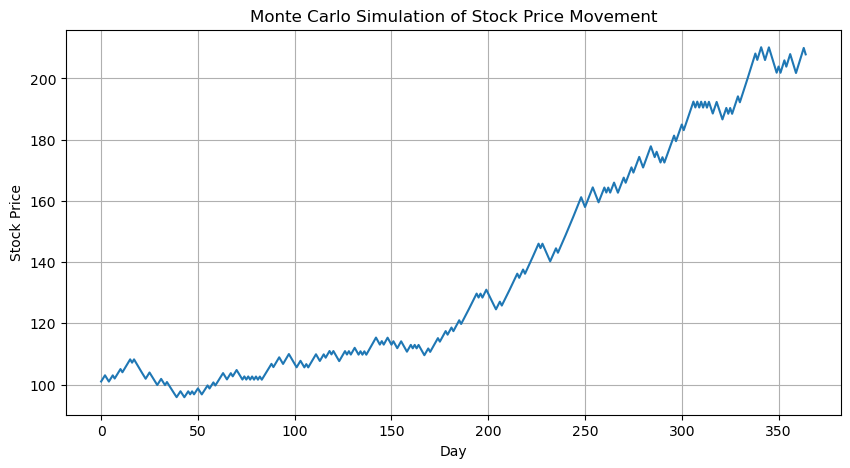

In [14]:
'''Task 7:
Monte Carlo – Stock Price Movement
Simulate a stock that starts at 100.
Each day it moves:
+1% with probability 0.6
-1% with probability 0.4
Simulate for 365 days and plot the price movement.'''

import random
import matplotlib.pyplot as plt

# Step 1: Initialize
days = 365
price = 100          # starting price
prices = [price]     # list to store price each day

# Step 2: Simulate daily movements
for _ in range(days):
    # Determine daily movement
    r = random.random()  # random number between 0 and 1
    if r < 0.6:
        price = price * 1.01   # +1%
    else:
        price = price * 0.99   # -1%
    
    prices.append(price)       # store the new price

# Step 3: Plot the price movement
plt.figure(figsize=(10,5))
plt.plot(prices)
plt.title("Monte Carlo Simulation of Stock Price Movement")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


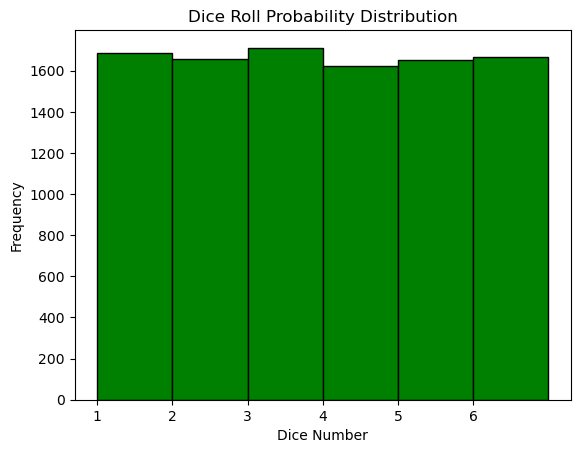

In [22]:
'''Task8:
Plot Question - Probability Distribution
Simulate 10,000 dice rolls and create one histogram showing the frequency of each number (1-6).
Add title: “Dice Roll Probability Distribution”.'''

import random
import matplotlib.pyplot as plt

# Step 1: Simulate 10,000 dice rolls
dice_rolls = [random.randint(1, 6) for _ in range(10000)]

# Step 2: Plot histogram
plt.hist(dice_rolls, bins=range(1, 8),color='green',edgecolor='black')

# Step 3: Add labels and title
plt.xlabel("Dice Number")
plt.ylabel("Frequency")
plt.title("Dice Roll Probability Distribution")
plt.xticks(range(1, 7))  # show numbers 1 to 6

# Step 4: Show plot
plt.show()
